In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter(test_prop1, sparsity_prop1, selectivity_prop1, test_single, sparsity_single, selectivity_single, test_combine, sparsity_combine, selectivity_combine):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_prop1, label='test_prop1', c='royalblue')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_prop1, label='sparsity_prop1', c='cornflowerblue')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_prop1, label='selectivity_prop1', c='lightsteelblue')
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_single, label='test_single', c='indigo')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_single, label='sparsity_single', c='darkorchid')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_single, label='selectivity_single', c='violet')
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_combine, label='test_combine', c='gold')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_combine, label='sparsity_combine', c='darkgoldenrod')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_combine, label='selectivity_combine', c='goldenrod')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(bbox_to_anchor=(1, 0.5))
    plt.show()

# Extract Values

## single

In [6]:
Adadelta_single_test = test_val_extractor('single/selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_test = test_val_extractor('single/selectivity_4_optim_single_Adagrad.txt')
Adam_single_test = test_val_extractor('single/selectivity_4_optim_single_Adam.txt')
SGD_single_test = test_val_extractor('single/selectivity_4_optim_single_SGD.txt')

In [7]:
Adadelta_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_Adadelta.txt')
Adagrad_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_Adagrad.txt')
Adam_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_Adam.txt')
SGD_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_SGD.txt')

In [8]:
Adadelta_single_selectivity_avg, Adadelta_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_selectivity_avg, Adagrad_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_Adagrad.txt')
Adam_single_selectivity_avg, Adam_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_Adam.txt')
SGD_single_selectivity_avg, SGD_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_SGD.txt')

## hyper

In [9]:
Adadelta_hyper_test = test_val_extractor('new_hyper/selectivity_hyper_Adadelta.txt')
SGD_hyper_test = test_val_extractor('new_hyper/selectivity_hyper_SGD.txt')

Adadelta_hyper_sparsity = sparsity_val_extractor('new_hyper/sparsity_hyper_Adadelta.txt')
SGD_hyper_sparsity = sparsity_val_extractor('new_hyper/sparsity_hyper_SGD.txt')

Adadelta_hyper_selectivity_avg, Adadelta_hyper_selectivity_std = selectivity_val_extractor('new_hyper/selectivity_hyper_Adadelta.txt')
SGD_hyper_selectivity_avg, SGD_hyper_selectivity_std = selectivity_val_extractor('new_hyper/selectivity_hyper_SGD.txt')

In [10]:
Adagrad_neurons_test = test_val_extractor('new_neurons/selectivity_neurons_Adagrad.txt')
Adam_neurons_test = test_val_extractor('new_neurons/selectivity_neurons_Adam.txt')

Adagrad_neurons_sparsity = sparsity_val_extractor('new_neurons/sparsity_neurons_Adagrad.txt')
Adam_neurons_sparsity = sparsity_val_extractor('new_neurons/sparsity_neurons_Adam.txt')

Adagrad_neurons_selectivity_avg, Adagrad_neurons_selectivity_std = selectivity_val_extractor('new_neurons/selectivity_neurons_Adagrad.txt')
Adam_neurons_selectivity_avg, Adam_neurons_selectivity_std = selectivity_val_extractor('new_neurons/selectivity_neurons_Adam.txt')

## combined

In [11]:
Adadelta_combined_test = test_val_extractor('combined/combine_selectivity_Adadelta.txt')
Adagrad_combined_test = test_val_extractor('combined/combine_selectivity_Adagrad.txt')
Adam_combined_test = test_val_extractor('combined/combine_selectivity_Adam.txt')
SGD_combined_test = test_val_extractor('combined/combine_selectivity_SGD.txt')

In [12]:
Adadelta_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_Adadelta.txt')
Adagrad_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_Adagrad.txt')
Adam_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_Adam.txt')
SGD_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_SGD.txt')

In [13]:
Adadelta_combined_selectivity_avg, Adadelta_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_Adadelta.txt')
Adagrad_combined_selectivity_avg, Adagrad_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_Adagrad.txt')
Adam_combined_selectivity_avg, Adam_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_Adam.txt')
SGD_combined_selectivity_avg, SGD_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_SGD.txt')

# Compare accuracy / sparsity / selectivity

## Adadelta

In [14]:
print("< Compare with hyper >")

print("test combined vs hyper:", Adadelta_combined_test[-1] - Adadelta_hyper_test[-1])
print("sparsity combined vs hyper:", Adadelta_combined_sparsity[-1] - Adadelta_hyper_sparsity[-1])
print("selectivity avg combined vs hyper:", Adadelta_combined_selectivity_avg[-1] - Adadelta_hyper_selectivity_avg[-1])
print("selectivity std combined vs hyper:", Adadelta_combined_selectivity_std[-1] - Adadelta_hyper_selectivity_std[-1])
print()

print("test combined vs hyper:", (Adadelta_combined_test[-1] / Adadelta_hyper_test[-1]) * 100)
print("sparsity combined vs hyper:", (Adadelta_combined_sparsity[-1] / Adadelta_hyper_sparsity[-1])* 100)
print("selectivity avg combined vs hyper:", (Adadelta_combined_selectivity_avg[-1] / Adadelta_hyper_selectivity_avg[-1])* 100)
print("selectivity std combined vs hyper:", (Adadelta_combined_selectivity_std[-1] / Adadelta_hyper_selectivity_std[-1])* 100)
print()

print("< Compare with single >")

print("test combined vs single:", Adadelta_combined_test[-1] - Adadelta_single_test[-1])
print("sparsity combined vs single:", Adadelta_combined_sparsity[-1] - Adadelta_single_sparsity[-1])
print("selectivity avg combined vs single:", Adadelta_combined_selectivity_avg[-1] - Adadelta_single_selectivity_avg[-1])
print("selectivity std combined vs single:", Adadelta_combined_selectivity_std[-1] - Adadelta_single_selectivity_std[-1])
print()
print("test combined vs single:", (Adadelta_combined_test[-1] / Adadelta_single_test[-1])*100)
print("sparsity combined vs single:", (Adadelta_combined_sparsity[-1] / Adadelta_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (Adadelta_combined_selectivity_avg[-1] / Adadelta_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (Adadelta_combined_selectivity_std[-1] / Adadelta_single_selectivity_std[-1])*100)

< Compare with hyper >
test combined vs hyper: -0.022399999999999975
sparsity combined vs hyper: 0.3036354184150696
selectivity avg combined vs hyper: 0.1024374414712631
selectivity std combined vs hyper: -0.06160746172351296

test combined vs hyper: 97.71101573676681
sparsity combined vs hyper: 154.9570805333758
selectivity avg combined vs hyper: 118.07747074098394
selectivity std combined vs hyper: 61.178302297069486

< Compare with single >
test combined vs single: -0.01759999999999995
sparsity combined vs single: 0.5172829926013947
selectivity avg combined vs single: 0.22721277458137712
selectivity std combined vs single: -0.08094360105336489

test combined vs single: 98.1926473608544
sparsity combined vs single: 252.65931805086979
selectivity avg combined vs single: 151.41925012814096
selectivity std combined vs single: 54.533605254602755


## Adagrad

In [15]:
print("< Compare with Neurons >")
print("test combined vs neurons:", Adagrad_combined_test[-1] - Adagrad_neurons_test[-1])
print("sparsity combined vs neurons:", Adagrad_combined_sparsity[-1] - Adagrad_neurons_sparsity[-1])
print("selectivity avg combined vs neurons:", Adagrad_combined_selectivity_avg[-1] - Adagrad_neurons_selectivity_avg[-1])
print("selectivity std combined vs neurons:", Adagrad_combined_selectivity_std[-1] - Adagrad_neurons_selectivity_std[-1])
print()

print("test combined vs neurons:", (Adagrad_combined_test[-1] / Adagrad_neurons_test[-1]) * 100)
print("sparsity combined vs neurons:", (Adagrad_combined_sparsity[-1] / Adagrad_neurons_sparsity[-1])* 100)
print("selectivity avg combined vs neurons:", (Adagrad_combined_selectivity_avg[-1] / Adagrad_neurons_selectivity_avg[-1])* 100)
print("selectivity std combined vs neurons:", (Adagrad_combined_selectivity_std[-1] / Adagrad_neurons_selectivity_std[-1])* 100)
print()

print("< Compare with single >")
print("test combined vs single:", Adagrad_combined_test[-1] - Adagrad_single_test[-1])
print("sparsity combined vs single:", Adagrad_combined_sparsity[-1] - Adagrad_single_sparsity[-1])
print("selectivity avg combined vs single:", Adagrad_combined_selectivity_avg[-1] - Adagrad_single_selectivity_avg[-1])
print("selectivity std combined vs single:", Adagrad_combined_selectivity_std[-1] - Adagrad_single_selectivity_std[-1])
print()
print("test combined vs single:", (Adagrad_combined_test[-1] / Adagrad_single_test[-1])*100)
print("sparsity combined vs single:", (Adagrad_combined_sparsity[-1] / Adagrad_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (Adagrad_combined_selectivity_avg[-1] / Adagrad_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (Adagrad_combined_selectivity_std[-1] / Adagrad_single_selectivity_std[-1])*100)

< Compare with Neurons >
test combined vs neurons: -0.0018000000000000238
sparsity combined vs neurons: -0.062674880027771
selectivity avg combined vs neurons: 0.0007525188086436874
selectivity std combined vs neurons: 0.004816376245397769

test combined vs neurons: 99.81643891495003
sparsity combined vs neurons: 92.16209541907719
selectivity avg combined vs neurons: 100.0980022661553
selectivity std combined vs neurons: 102.89872238196793

< Compare with single >
test combined vs single: 0.0028000000000000247
sparsity combined vs single: 0.15984630584716797
selectivity avg combined vs single: 0.11351806134918141
selectivity std combined vs single: -0.033156936494650874

test combined vs single: 100.28688524590163
sparsity combined vs single: 127.69738175912069
selectivity avg combined vs single: 117.32854037035798
selectivity std combined vs single: 83.75682763753038


# Adam

In [16]:
print("< Compare with Neurons >")
print("test combined vs neurons:", Adam_combined_test[-1] - Adam_neurons_test[-1])
print("sparsity combined vs neurons:", Adam_combined_sparsity[-1] - Adagrad_neurons_sparsity[-1])
print("selectivity avg combined vs neurons:", Adam_combined_selectivity_avg[-1] - Adam_neurons_selectivity_avg[-1])
print("selectivity std combined vs neurons:", Adam_combined_selectivity_std[-1] - Adam_neurons_selectivity_std[-1])
print()

print("test combined vs neurons:", (Adam_combined_test[-1] / Adam_neurons_test[-1]) * 100)
print("sparsity combined vs neurons:", (Adam_combined_sparsity[-1] / Adam_neurons_sparsity[-1])* 100)
print("selectivity avg combined vs neurons:", (Adam_combined_selectivity_avg[-1] / Adam_neurons_selectivity_avg[-1])* 100)
print("selectivity std combined vs neurons:", (Adam_combined_selectivity_std[-1] / Adam_neurons_selectivity_std[-1])* 100)
print()

print("< Compare with single >")
print("test combined vs single:", Adam_combined_test[-1] - Adam_single_test[-1])
print("sparsity combined vs single:", Adam_combined_sparsity[-1] - Adam_single_sparsity[-1])
print("selectivity avg combined vs single:", Adam_combined_selectivity_avg[-1] - Adam_single_selectivity_avg[-1])
print("selectivity std combined vs single:", Adam_combined_selectivity_std[-1] - Adam_single_selectivity_std[-1])
print()
print("test combined vs single:", (Adam_combined_test[-1] / Adam_single_test[-1])*100)
print("sparsity combined vs single:", (Adam_combined_sparsity[-1] / Adam_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (Adam_combined_selectivity_avg[-1] / Adam_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (Adam_combined_selectivity_std[-1] / Adam_single_selectivity_std[-1])*100)

< Compare with Neurons >
test combined vs neurons: -0.0009000000000000119
sparsity combined vs neurons: -0.27272921800613403
selectivity avg combined vs neurons: 0.08881851278091202
selectivity std combined vs neurons: -0.01826835866438295

test combined vs neurons: 99.90858303707466
sparsity combined vs neurons: 121.52840347788599
selectivity avg combined vs neurons: 117.27246103308985
selectivity std combined vs neurons: 88.47318206354274

< Compare with single >
test combined vs single: 0.007000000000000006
sparsity combined vs single: 0.16199028491973877
selectivity avg combined vs single: 0.15248329670060912
selectivity std combined vs single: -0.018951439671967996

test combined vs single: 100.71677247593693
sparsity combined vs single: 144.3907864992356
selectivity avg combined vs single: 133.8433928918844
selectivity std combined vs single: 88.09349486553886


## SGD

In [17]:
print("< Compare with hyper >")

print("test combined vs hyper:", SGD_combined_test[-1] - SGD_hyper_test[-1])
print("sparsity combined vs hyper:", SGD_combined_sparsity[-1] - SGD_hyper_sparsity[-1])
print("selectivity avg combined vs hyper:", SGD_combined_selectivity_avg[-1] - SGD_hyper_selectivity_avg[-1])
print("selectivity std combined vs hyper:", SGD_combined_selectivity_std[-1] - SGD_hyper_selectivity_std[-1])
print()

print("test combined vs hyper:", (SGD_combined_test[-1] / SGD_hyper_test[-1]) * 100)
print("sparsity combined vs hyper:", (SGD_combined_sparsity[-1] / SGD_hyper_sparsity[-1])* 100)
print("selectivity avg combined vs hyper:", (SGD_combined_selectivity_avg[-1] / SGD_hyper_selectivity_avg[-1])* 100)
print("selectivity std combined vs hyper:", (SGD_combined_selectivity_std[-1] / SGD_hyper_selectivity_std[-1])* 100)
print()

print("< Compare with single >")

print("test combined vs single:", SGD_combined_test[-1] - SGD_single_test[-1])
print("sparsity combined vs single:", SGD_combined_sparsity[-1] - SGD_single_sparsity[-1])
print("selectivity avg combined vs single:", SGD_combined_selectivity_avg[-1] - SGD_single_selectivity_avg[-1])
print("selectivity std combined vs single:", SGD_combined_selectivity_std[-1] - SGD_single_selectivity_std[-1])
print()
print("test combined vs single:", (SGD_combined_test[-1] / SGD_single_test[-1])*100)
print("sparsity combined vs single:", (SGD_combined_sparsity[-1] / SGD_single_sparsity[-1])*100)
print("selectivity avg combined vs single:", (SGD_combined_selectivity_avg[-1] / SGD_single_selectivity_avg[-1])*100)
print("selectivity std combined vs single:", (SGD_combined_selectivity_std[-1] / SGD_single_selectivity_std[-1])*100)

< Compare with hyper >
test combined vs hyper: -0.01529999999999998
sparsity combined vs hyper: 0.3643975853919983
selectivity avg combined vs hyper: 0.15491812760171375
selectivity std combined vs hyper: -0.039502467079693404

test combined vs hyper: 98.44401505135768
sparsity combined vs hyper: 179.77259453458592
selectivity avg combined vs hyper: 129.03350276811878
selectivity std combined vs hyper: 72.88996500225639

< Compare with single >
test combined vs single: 0.01090000000000002
sparsity combined vs single: 0.39553147554397583
selectivity avg combined vs single: 0.17467275202663346
selectivity std combined vs single: -0.040105219983185475

test combined vs single: 101.13885696374464
sparsity combined vs single: 192.92158585916295
selectivity avg combined vs single: 133.99430973856212
selectivity std combined vs single: 72.58968935805404


# Adadelta

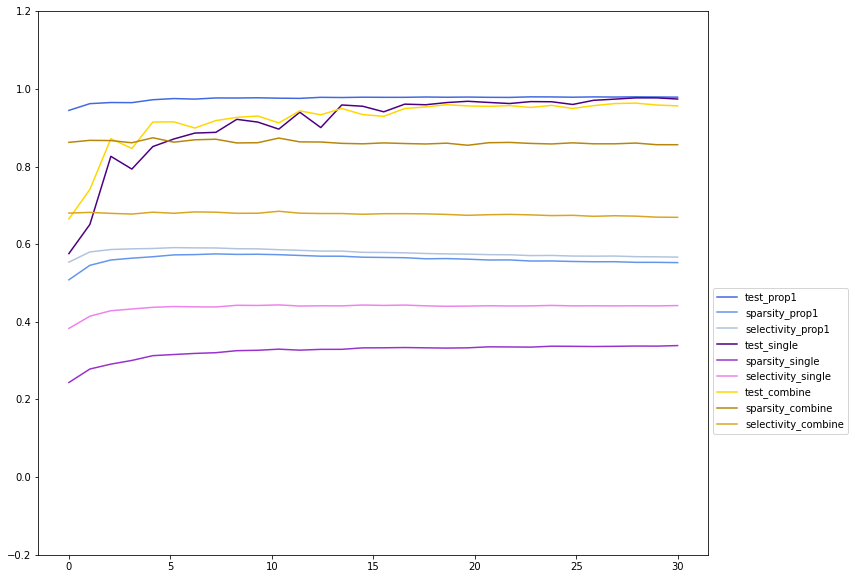

In [18]:
all_plotter(Adadelta_hyper_test, Adadelta_hyper_sparsity, Adadelta_hyper_selectivity_avg, 
            Adadelta_single_test, Adadelta_single_sparsity, Adadelta_single_selectivity_avg, 
            Adadelta_combined_test, Adadelta_combined_sparsity, Adadelta_combined_selectivity_avg)

# Adagrad

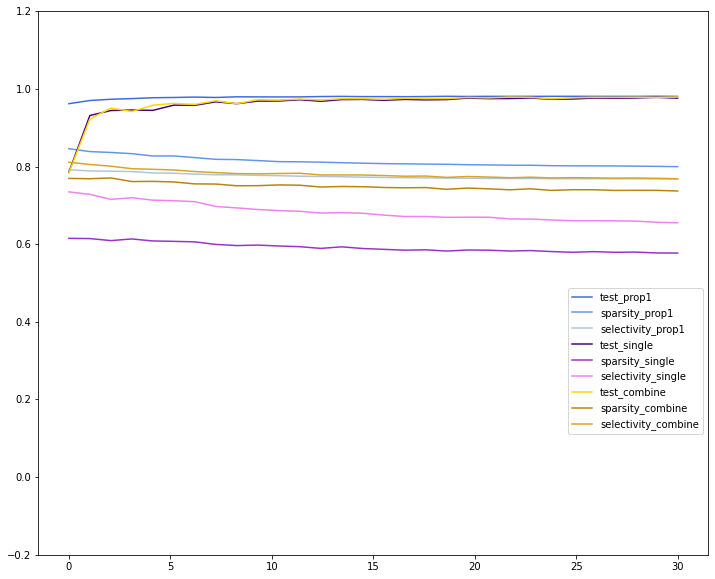

In [19]:
all_plotter(Adagrad_neurons_test, Adagrad_neurons_sparsity, Adagrad_neurons_selectivity_avg, 
            Adagrad_single_test, Adagrad_single_sparsity, Adagrad_single_selectivity_avg, 
            Adagrad_combined_test, Adagrad_combined_sparsity, Adagrad_combined_selectivity_avg)

# Adam

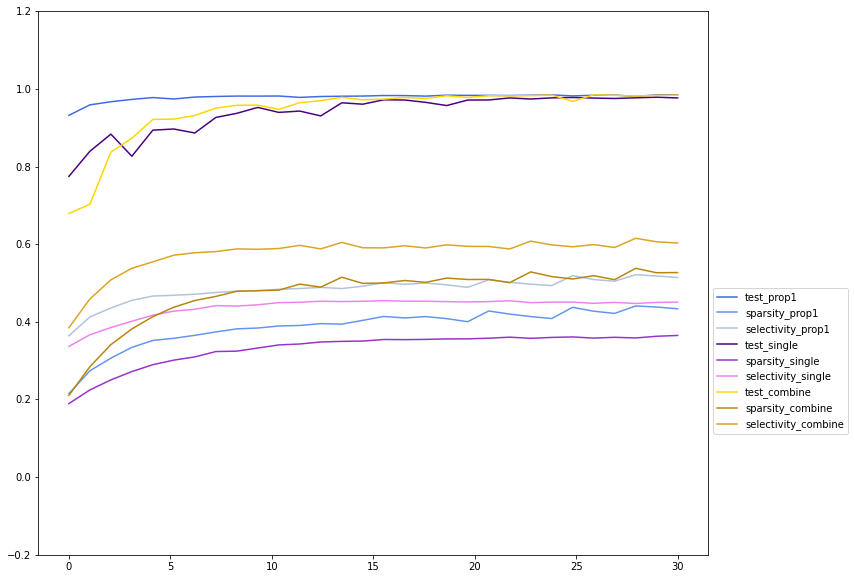

In [20]:
all_plotter(Adam_neurons_test, Adam_neurons_sparsity, Adam_neurons_selectivity_avg, 
            Adam_single_test, Adam_single_sparsity, Adam_single_selectivity_avg, 
            Adam_combined_test, Adam_combined_sparsity, Adam_combined_selectivity_avg)

# SGD

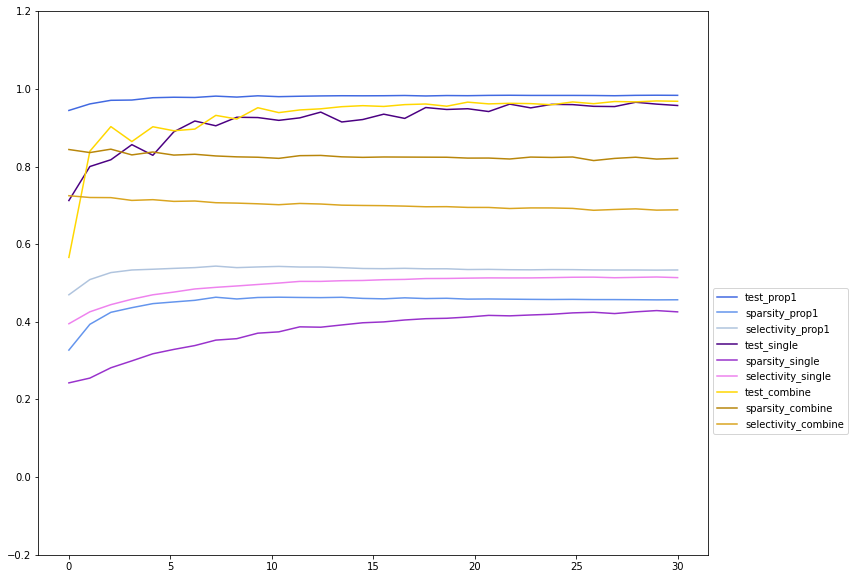

In [21]:
all_plotter(SGD_hyper_test, SGD_hyper_sparsity, SGD_hyper_selectivity_avg, 
            SGD_single_test, SGD_single_sparsity, SGD_single_selectivity_avg, 
            SGD_combined_test, SGD_combined_sparsity, SGD_combined_selectivity_avg)